# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a>, який зберегли наприкінці попередньої роботи (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. Дослідити ознаки, побудувавши їх візуалізації
2. Порахувати кореляцію між всіма кількісними ознаками
3. Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. Візуально оцініть наявність та силу зв'язку між цими ознаками.   
4. Які кількісні ознаки можуть бути предикторами кількості викидів СО2?
5. Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити ознаки, побудувавши їх візуалізації</p>
</div>


Імпортую необхідні бібліотеки

In [1]:
import pandas as pd
import numpy as np

Зчитую дані з файлу у дата фрейм

In [4]:
df = pd.read_csv('clean_data2.csv')
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9.809225e+03,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5.716853e+03,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,1.454002e+05,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,8.293738e+06,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,4.620420e+02,470,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,9140.125952,102951.0,3.223130e+07,350,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,7.307356e+08,6020,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,2.269873e+04,527970,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4.503076e+03,752610,22.045136


Імпортую бібліотеки для візуалізації

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Досліджую датафрейм

In [8]:
df.dtypes

Country Name           object
Region                 object
GDP per capita        float64
Populatiion           float64
CO2 emission          float64
Area                    int64
Population density    float64
dtype: object

Побудуємо діаграми розсіювання для кількісних характеристик

<Axes: xlabel='Area', ylabel='Populatiion'>

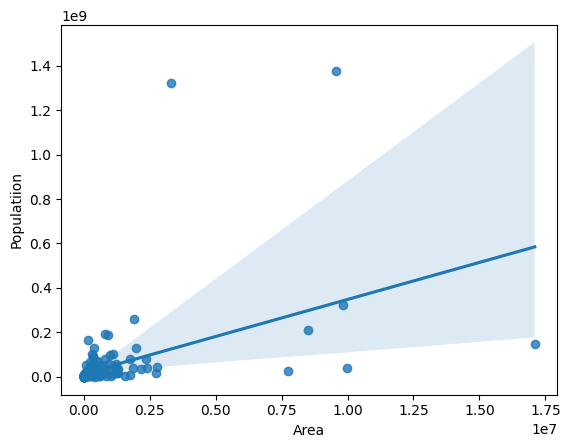

In [18]:
sns.regplot(x='Area', y='Populatiion', data=df)

Як бачимо з діаграми, площа ймовірно є предиктором кількості населення країни: зі збільшенням площі країни зростає і кількість населення. Перевіримо цю гіпотезу шляхом знаходження кореляціЇ

In [20]:
df[['Area', 'Populatiion']].corr()

,Area,Populatiion
Area,1.000000,0.453727
Populatiion,0.453727,1.000000


Коефіцієнт кореляції 0.453727 свідчить про помірний позитивни зв'язок між змінними, тобто зв'язок є, але він не надто сильний.

Дослідимо іншу пару ознак:

<Axes: xlabel='Area', ylabel='Population density'>

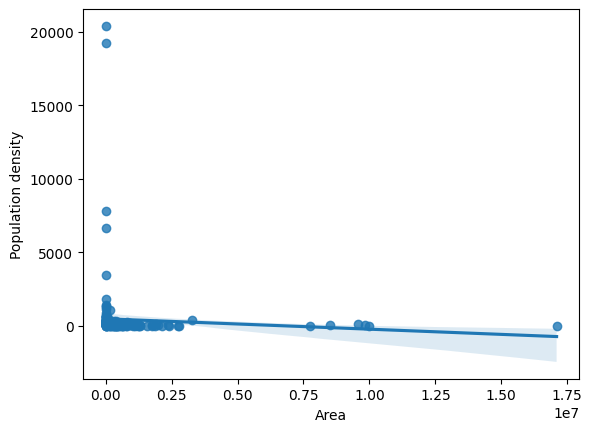

In [32]:
sns.regplot(x='Area', y='Population density', data=df)

Як бачимо, зі збільшенням площі країни густина населення  несуттєво зменшується. Для перевірки гіпотези знайдемо кореляцію

In [34]:
df[['Area', 'Population density']].corr()

,Area,Population density
Area,1.000000,-0.063845
Population density,-0.063845,1.000000


Коефіцієнт кореляції -0,063845 вказує на дуже слабку негативну лінійну залежність між досліджуваними змінними. 

Перейдемо до наступної пари характеристик

<Axes: xlabel='GDP per capita', ylabel='CO2 emission'>

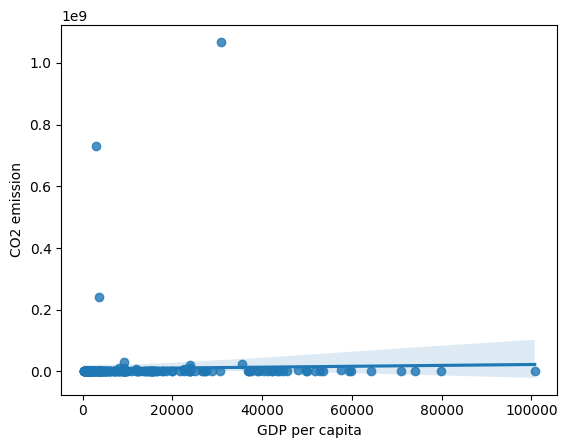

In [38]:
sns.regplot(x='GDP per capita', y='CO2 emission', data=df)

Здавалось б, більш розвинені країни, як правило, мають більш розвинену промисловість і, відповідно, вищий рівень викидів CO2, проте ця думка руйнується за допомогою цієї візуалізації. Знайдемо коефіцієнт кореляції між цими двома характеристиками

In [41]:
df[['GDP per capita', 'CO2 emission']].corr()

,GDP per capita,CO2 emission
GDP per capita,1.000000,0.027841
CO2 emission,0.027841,1.000000


Коефіцієнт кореляції 0,027841 вказує на дуже слабкий позитивний лінійний зв'язок між досліджуваними характеристиками, тобто рівень розвитку країн не має помітного впливу на рівень викидів СО2 в країні

Дослідимо вплив щільності населення на ВВП на душу населення

<Axes: xlabel='Population density', ylabel='GDP per capita'>

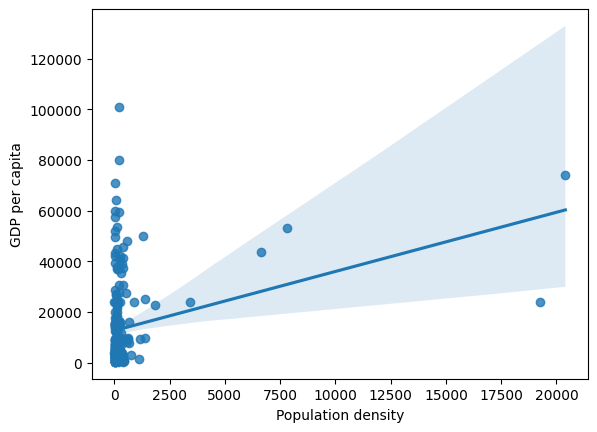

In [45]:
sns.regplot(x='Population density', y='GDP per capita', data=df)

Як бачимо, зі зростанням щільності населення країни, зростає і рівень ВВП на душу населення країни. Щоб переконатися у цьому, обчислимо коефіцієнт кореляції між характеристиками

In [46]:
df[['Population density', 'GDP per capita']].corr()

,Population density,GDP per capita
Population density,1.000000,0.273792
GDP per capita,0.273792,1.000000


Коефіцієнт кореляції 0,273792 вказує на слабкий позитивний лінійний зв'язок між щільністю населення країни та рівнем ВВП на душу населення

Дослідимо якісні (категоріальні) змінні

Розглянемо зв'язок між регіонами та рівнем ВВП на душу населення.

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


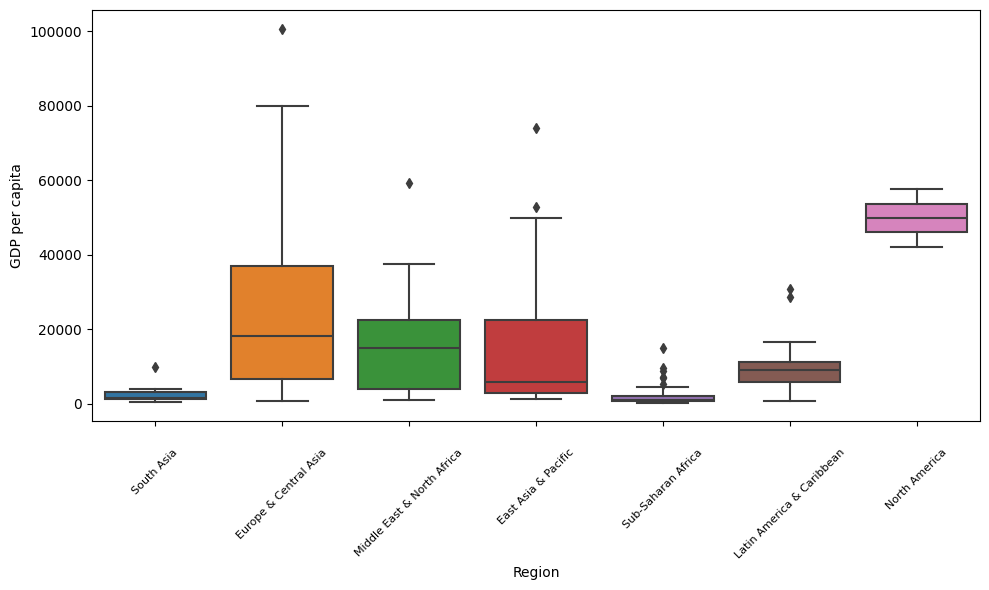

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Region', y='GDP per capita', data=df, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=8, pad=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Як видно з діаграми, розподіл ВВП на душу населення між континентами значно збігається для деяких континентів, тому континент не завжди буде хорошим предикатом рівня ВВП, проте він все ще може бути хорошим предикатом окремих регіонів 

Розглянемо зв'язок між регіоном та рівнем викидів CO2

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


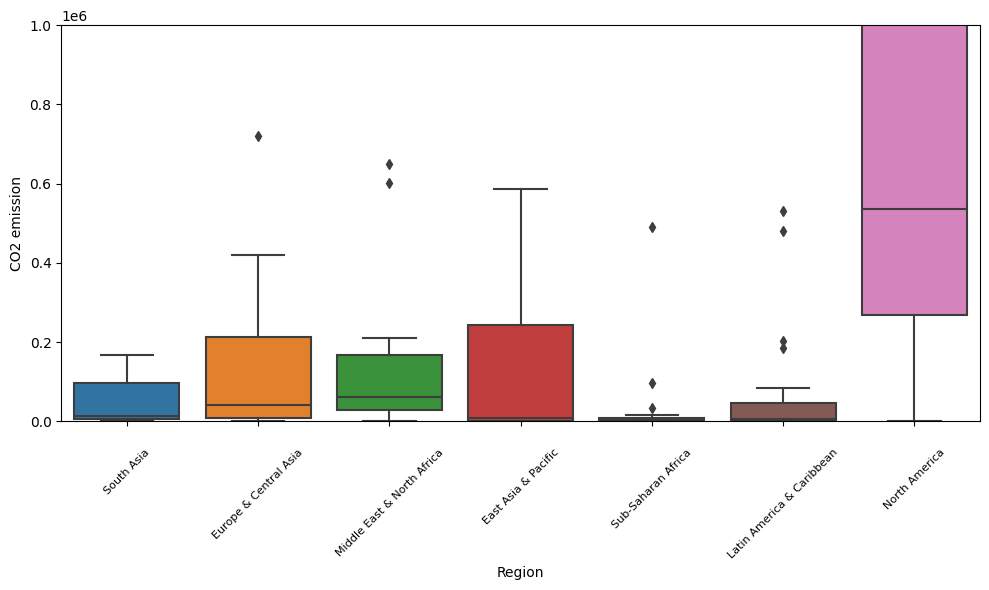

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Region', y='CO2 emission', data=df, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=8, pad=15)
plt.xticks(rotation=45)
ax.set_ylim(0, 1e6)
plt.tight_layout()
plt.show()

Як видно з діаграми, розподіл рівня викидів CO2 між континентами значно збігається для деяких континентів, тому континент не завжди буде хорошим предикатом рівня викидів CO2, проте він все ще може бути хорошим предикатом окремих регіонів 

Розглянемо зв'язок між регіонами та розмірами країни

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


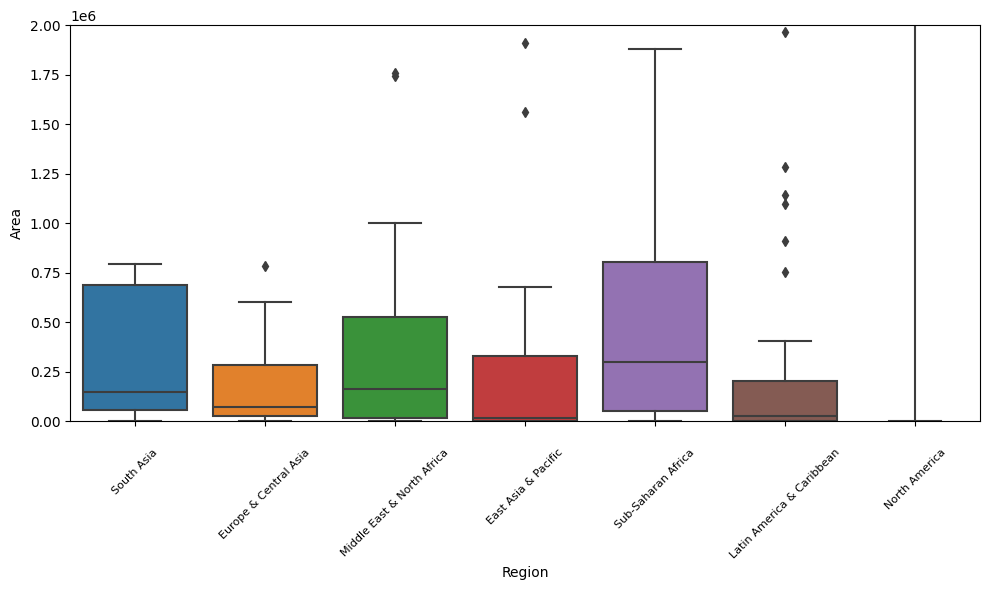

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Region', y='Area', data=df, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=8, pad=15)
plt.xticks(rotation=45)
plt.tight_layout()
ax.set_ylim(0, 2e6)
plt.show()

Як видно з діаграми, площа країн по регіонам значно збігається, тому регіон не може бути хорошим предиктором площі країни.

Розглянемо зв'язок між регіонами та розміром населення країн

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


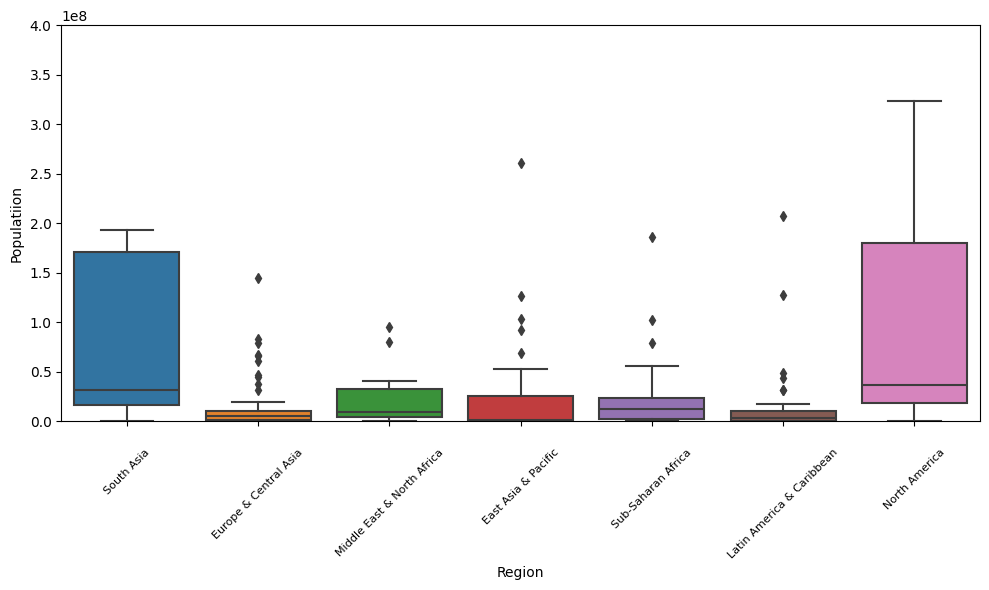

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Region', y='Populatiion', data=df, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=8, pad=15)
plt.xticks(rotation=45)
ax.set_ylim(0, 4e8)
plt.tight_layout()
plt.show()

З діаграми видно, що розмір населення країн значно збігається, тому регіон не може бути хорошим предиктором населення

Розглянемо зв'язок між регіонами та щільністю населення країн

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


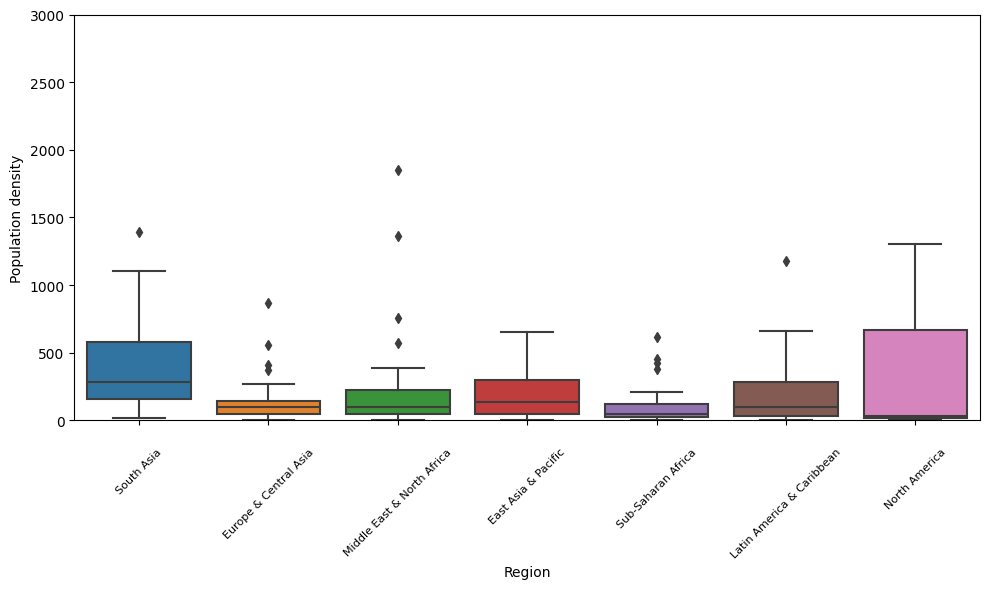

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Region', y='Population density', data=df, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=8, pad=15)
plt.xticks(rotation=45)
ax.set_ylim(0, 3000)
plt.tight_layout()
plt.show()

З діаграми видно, що розмір щільність значно збігається, тому регіон не може бути хорошим предиктором З діаграми видно, що розмір населення країн значно збігається, тому регіон не може бути хорошим предиктором щільності населення

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Порахувати кореляцію між всіма кількісними ознаками</p>
</div>


Рахую кореляцію між всіма кількісними ознаками

In [76]:
df.corr(numeric_only=True)

,GDP per capita,Populatiion,CO2 emission,Area,Population density
GDP per capita,1.000000,-0.050892,0.027841,0.055661,0.273792
Populatiion,-0.050892,1.000000,-0.018447,0.453727,-0.028238
CO2 emission,0.027841,-0.018447,1.000000,-0.032305,0.005150
Area,0.055661,0.453727,-0.032305,1.000000,-0.063845
Population density,0.273792,-0.028238,0.005150,-0.063845,1.000000


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. </p>
<p>Візуально оцініть наявність та силу зв'язку між цими ознаками.</p>
</div>


Будую діаграму розсіювання для ознак 'Area' та 'CO2 emission'

<Axes: xlabel='Area', ylabel='CO2 emission'>

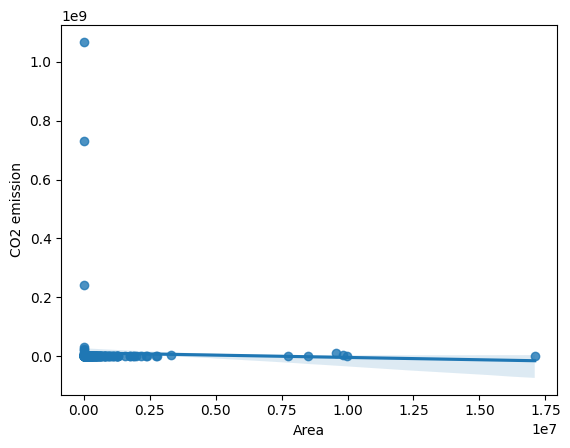

In [81]:
sns.regplot(x='Area', y='CO2 emission', data=df)

На діаграмі бачимо, що точки утворили майже горизонтальну лінію, це свідчить про слабку негативну, майже не помітну кореляцію. Значення з кореляційної матриці це підтверджує.

Будую діаграму розсіювання для ознак 'GDP per capita' та 'CO2 emission'

<Axes: xlabel='GDP per capita', ylabel='CO2 emission'>

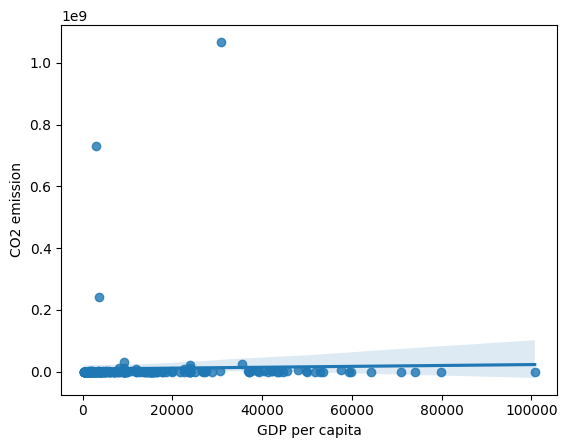

In [83]:
sns.regplot(x='GDP per capita', y='CO2 emission', data=df)

На діаграмі бачимо, що точки утворили майже горизонтальну лінію, це свідчить про слабку позитивну, майже не помітну кореляцію. Значення з кореляційної матриці це підтверджує.

Будую діаграму розсіювання для ознак 'Populatiion' та 'CO2 emission'

<Axes: xlabel='Populatiion', ylabel='CO2 emission'>

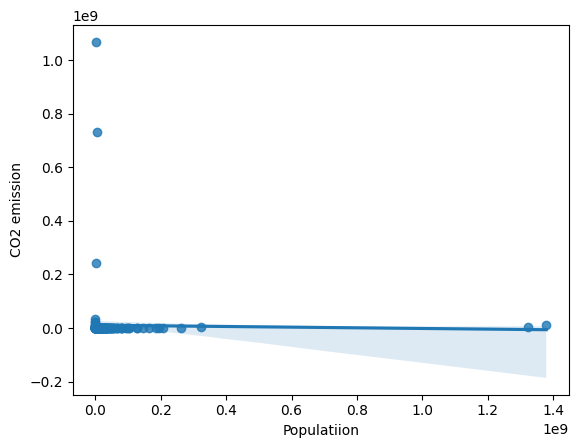

In [86]:
sns.regplot(x='Populatiion', y='CO2 emission', data=df)

На діаграмі бачимо, що точки утворили майже горизонтальну лінію, це свідчить про слабку негативну, майже не помітну кореляцію. Значення з кореляційної матриці це підтверджує.

Будую діаграму розсіювання для 'Population density'  та 'CO2 emission'

<Axes: xlabel='Population density', ylabel='CO2 emission'>

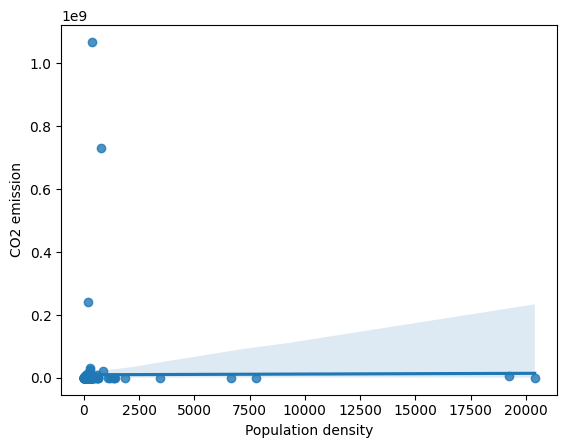

In [88]:
sns.regplot(x='Population density', y='CO2 emission', data=df)

На діаграмі бачимо, що точки утворили майже горизонтальну лінію, це свідчить про слабку позитивну, майже не помітну кореляцію. Значення з кореляційної матриці це підтверджує.

Будую діаграму розмаху для 'CO2 emission' по регіонам

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


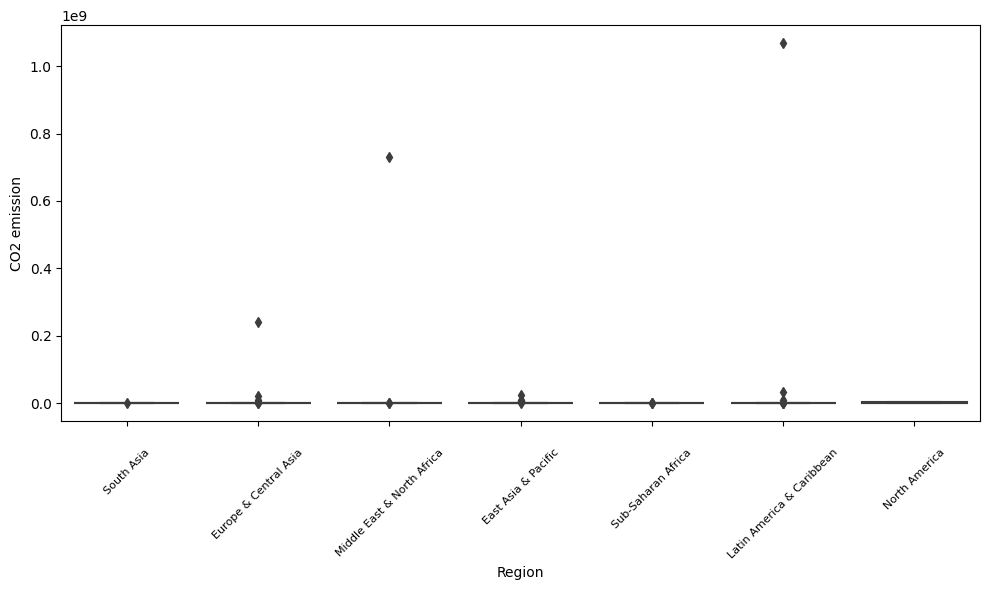

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Region', y='CO2 emission', data=df, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=8, pad=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Розглянувши викиди, зменшимо масштаб

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


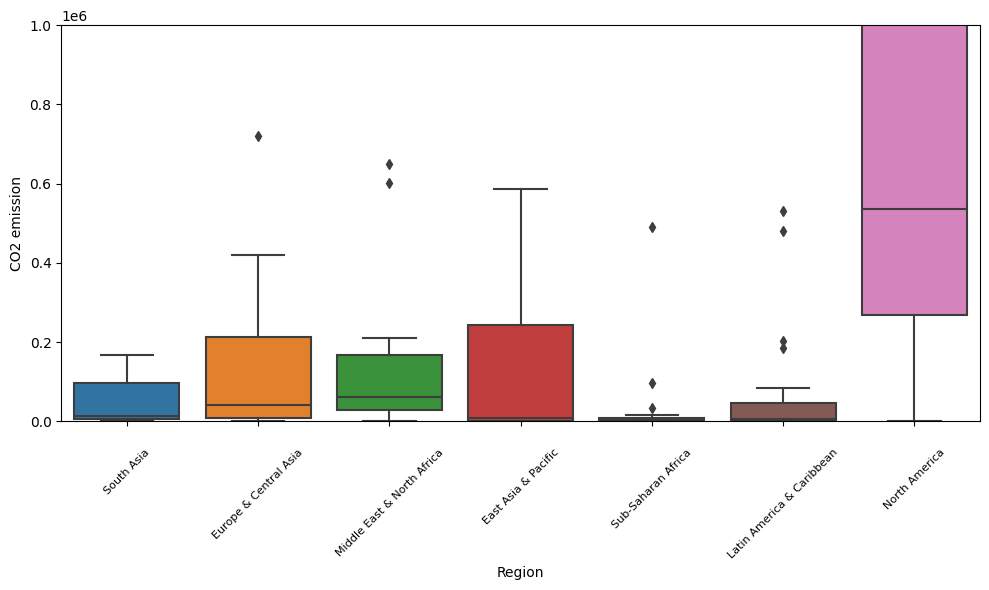

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Region', y='CO2 emission', data=df, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=8, pad=15)
plt.xticks(rotation=45)
ax.set_ylim(0, 1e6)
plt.tight_layout()
plt.show()

Як видно з діаграми, розподіл рівня викидів CO2 між континентами значно збігається для деяких континентів, тому континент не завжди буде хорошим предикатом рівня викидів CO2, проте він все ще може бути хорошим предикатом для регіонів 


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Які кількісні ознаки можуть бути предикторами кількості викидів СО2?</p>
</div>


Обчислюю коефіцієнт кореляції Пірсона та P-value для всіх кількісних змінних та 'CO2 emission'

In [98]:
df.corr(numeric_only=True)['CO2 emission']


GDP per capita        0.027841
Populatiion          -0.018447
CO2 emission          1.000000
Area                 -0.032305
Population density    0.005150
Name: CO2 emission, dtype: float64

In [100]:
from scipy.stats import pearsonr
p_values = {}
for col in ['GDP per capita', 'Populatiion', 'Area', 'Population density']:
    r, p = pearsonr(df['CO2 emission'], df[col])
    p_values[col] = p
p_values

{'GDP per capita': 0.6833990498228641,
 'Populatiion': 0.7870075233354417,
 'Area': 0.6360261874708943,
 'Population density': 0.9398785907813985}

З результатів випливає, що жодна з досліджуваних кількісних змінних не має статистично значущого впливу на рівень викидів CO2

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам</p>
</div>


Групую дані, щоб побачити чи впливає 'Region' на 'CO2 emission'.

In [141]:
df_grouped = df[['Region', 'CO2 emission']].groupby(['Region'])
df_grouped.mean()

,CO2 emission
Region,
East Asia & Pacific,1.481207e+06
Europe & Central Asia,5.028236e+06
Latin America & Caribbean,2.647898e+07
Middle East & North Africa,3.492030e+07
North America,1.930683e+06
South Asia,3.145543e+05
Sub-Saharan Africa,1.700846e+04


За нашими даними здається, що країни регіону 'Europe & Central Asia' у середньому мають найвищий рівень викидів, у той час як країни регіону 'East Asia & Pacific' - найнижчий рівень викидів 

Скористаюсь функцією <code>f_oneway</code> з модуля "stats" для отримання F-test score та P-value.

In [142]:
from scipy.stats import f_oneway

co2_emissions = [df.loc[df['Region'] == region, 'CO2 emission'] for region in df['Region'].unique()]

f_score, p_value = f_oneway(*co2_emissions)
f_score, p_value = f_oneway(*co2_emissions)

print(f'F-score: {f_score:.2f}')
print(f'P-value: {p_value:.4f}')

F-score: 0.71
P-value: 0.6382


Результат із F-score = 0.71 показником тесту, який показує  слабку (статистично не значущу) кореляцію, і P-value = 0.6382 , що вказує на відсутність статистично значущого впливу регіону на рівень викидів. Але чи означає це, що досліджувані групи не корелюють між собою?

Розглянемо їх окремо.

In [143]:
df['Region'].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

In [148]:
from itertools import combinations

regions = df['Region'].unique()

for region1, region2 in combinations(regions, 2):
    co2_region1 = df[df['Region'] == region1]['CO2 emission']
    co2_region2 = df[df['Region'] == region2]['CO2 emission']
    
    # Perform ANOVA test
    f_val, p_val = f_oneway(co2_region1, co2_region2)
    
    print(f"{region1} vs {region2}: F = {f_val:.2f}, P = {p_val:.4f}")

South Asia vs Europe & Central Asia: F = 0.17, P = 0.6796
South Asia vs Middle East & North Africa: F = 0.37, P = 0.5489
South Asia vs East Asia & Pacific: F = 0.51, P = 0.4799
South Asia vs Sub-Saharan Africa: F = 7.30, P = 0.0092
South Asia vs Latin America & Caribbean: F = 0.20, P = 0.6579
South Asia vs North America: F = 2.45, P = 0.1522
Europe & Central Asia vs Middle East & North Africa: F = 1.87, P = 0.1751
Europe & Central Asia vs East Asia & Pacific: F = 0.45, P = 0.5043
Europe & Central Asia vs Sub-Saharan Africa: F = 1.18, P = 0.2796
Europe & Central Asia vs Latin America & Caribbean: F = 0.94, P = 0.3350
Europe & Central Asia vs North America: F = 0.03, P = 0.8682
Middle East & North Africa vs East Asia & Pacific: F = 1.65, P = 0.2046
Middle East & North Africa vs Sub-Saharan Africa: F = 2.35, P = 0.1304
Middle East & North Africa vs Latin America & Caribbean: F = 0.04, P = 0.8470
Middle East & North Africa vs North America: F = 0.12, P = 0.7285
East Asia & Pacific vs Sub-S

# Висновок

Спираючись на отримані результати P-value, можемо стверджувати, що значення F-тесту не є статистично значущими і ми не мржемо відкидати припущення, про рівність середніх значень груп, адже P-value значно перевищують рівень значущості.

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

Групування кількісної змінної в категорії було в попередній лабораторній роботі. Використайте функцію "cut"
</details>

# 1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.


In [152]:
tukey_results = pairwise_tukeyhsd(endog=df['CO2 emission'], groups=df['Region'], alpha=0.05)

tukey_results_df = tukey_results.summary()

tukey_results_data = tukey_results_df.data[1:]

columns = tukey_results_df.data[0]

tukey_results_df = pd.DataFrame(data=tukey_results_data, columns=columns)

tukey_results_df['mean_diff'] = tukey_results_df['meandiff'].abs()

sorted_tukey_results_df = tukey_results_df.sort_values(by='mean_diff', ascending=False)

top_pair = sorted_tukey_results_df.iloc[0]

print(f"{top_pair['group1']} and {top_pair['group2']},\n" +
      f"mean difference: {top_pair['mean_diff']}, p-value: {top_pair['p-adj']}")

Middle East & North Africa and Sub-Saharan Africa,
mean difference: 34903290.4913, p-value: 0.7495


# 2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


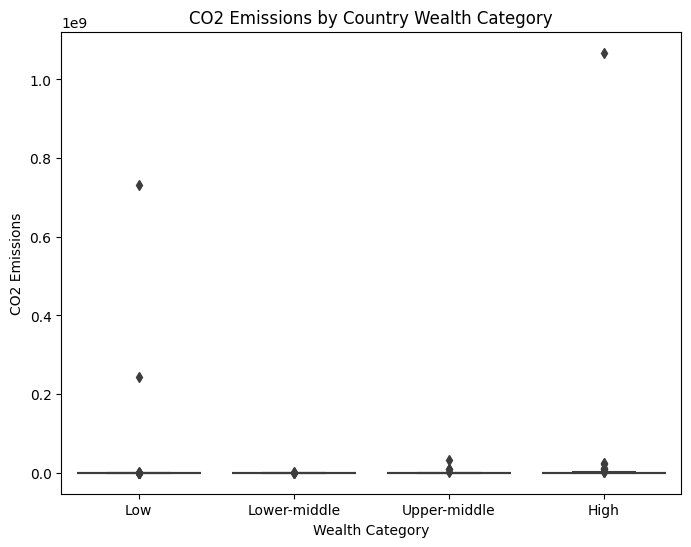

In [156]:
categories = ['Low', 'Lower-middle', 'Upper-middle', 'High']
df['RichCountry'] = pd.cut(df['GDP per capita'], bins=[0, 5000, 8000, 10000, float('inf')], labels=categories, right=False)
plt.figure(figsize=(8, 6))
sns.boxplot(x='RichCountry', y='CO2 emission', data=df)
plt.title('CO2 Emissions by Country Wealth Category')
plt.xlabel('Wealth Category')
plt.ylabel('CO2 Emissions')
plt.show()

Збільшимо масштаб

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


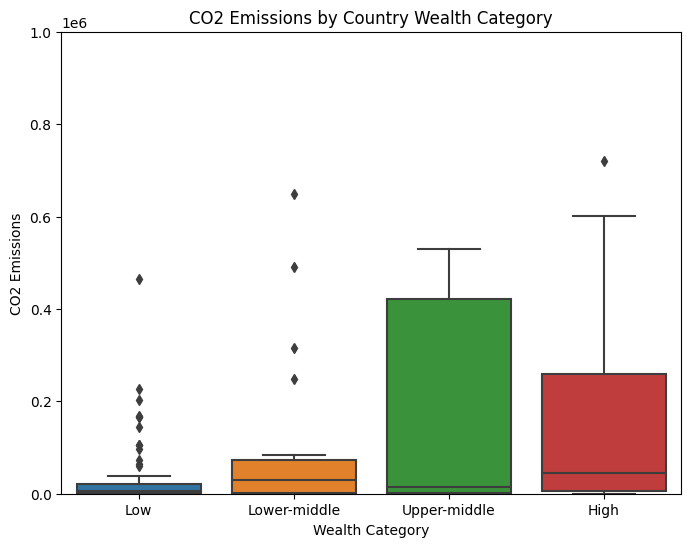

In [160]:
categories = ['Low', 'Lower-middle', 'Upper-middle', 'High']
df['RichCountry'] = pd.cut(df['GDP per capita'], bins=[0, 5000, 8000, 10000, float('inf')], labels=categories, right=False)
plt.figure(figsize=(8, 6))
sns.boxplot(x='RichCountry', y='CO2 emission', data=df)
plt.title('CO2 Emissions by Country Wealth Category')
plt.xlabel('Wealth Category')
plt.ylabel('CO2 Emissions')
plt.ylim(0, 1e6)
plt.show()

З діаграми бачимо, що рівень викидів CO2 значно збігається для більшості категорій, тому ця метрика не може бути хорошим предикатом рівня викидів CO2, проте вона може бути предиктором для окремих категорій держав

# 3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

In [164]:
wealth_categories = df['RichCountry'].unique()

category_combinations = list(combinations(wealth_categories, 2))

for category1, category2 in category_combinations:
    emissions1 = df[df['RichCountry'] == category1]['CO2 emission']
    emissions2 = df[df['RichCountry'] == category2]['CO2 emission']
    
    f_val, p_val = f_oneway(emissions1, emissions2)
    
    print(f"{category1} vs {category2}:")
    print("F-value:", f_val)
    print("P-value:", p_val)
    print()

Low vs High:
F-value: 0.09110429291645387
P-value: 0.7631404753357902

Low vs Upper-middle:
F-value: 0.2082029615681627
P-value: 0.6490327293810387

Low vs Lower-middle:
F-value: 0.3292668258329996
P-value: 0.5672215080696215

High vs Upper-middle:
F-value: 0.2254963650700602
P-value: 0.6359294040866619

High vs Lower-middle:
F-value: 0.29500654337765386
P-value: 0.588275911647159

Upper-middle vs Lower-middle:
F-value: 2.239564051346231
P-value: 0.14236839757757325



У жодному з випадків не можемо відкидати нульову гіпотезу

<h2>Виконав студент групи ІП-21 <br> Пізнак Роман</h2>